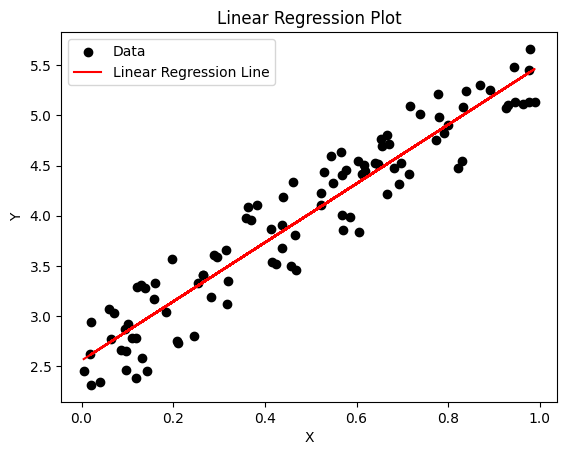

In [1]:
# program no 01
# Without Dataset
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate random data
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)

# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Plot the data and the regression line
plt.scatter(x, y, color='black', label='Data')
plt.plot(x, y_pred, color='red', label='Linear Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Plot')
plt.legend()
plt.show()

In [2]:
# PROGRAM 02
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Logic gates input and output data
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = {
    'AND': np.array([0, 0, 0, 1]),
    'OR': np.array([0, 1, 1, 1]),
    'XOR': np.array([0, 1, 1, 0])
}

# Function to create the feedforward neural network model
def create_model():
    model = Sequential([
        Dense(8, input_dim=2, activation='relu'),  # Hidden layer with 8 neurons
        Dense(1, activation='sigmoid')  # Output layer with sigmoid activation
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train and evaluate the model for each logic gate
for gate, output in outputs.items():
    model = create_model()
    epochs = 2000 if gate == 'XOR' else 1000
    model.fit(input_data, output, epochs=epochs, verbose=0)
    _, accuracy = model.evaluate(input_data, output)
    print(f"{gate} gate accuracy: {accuracy * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 1.0000 - loss: 0.0603
AND gate accuracy: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 1.0000 - loss: 0.1587
OR gate accuracy: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 1.0000 - loss: 0.0931
XOR gate accuracy: 100.00%


In [ ]:
#program 03
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Build and compile CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train and evaluate
model.fit(train_images, train_labels, epochs=3, verbose=1)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f'Test accuracy: {test_acc}')

# Plot sample predictions
predictions = model.predict(test_images[:5])
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[i])
    plt.title(class_names[np.argmax(predictions[i])])
    plt.axis('off')
plt.show()

In [ ]:
# program 04
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, x_test = x_train.reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1)
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Build CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile and train model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')

# Predict and display first test image
predictions = model.predict(x_test)
predicted_label = np.argmax(predictions[0])
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f'Predicted Label: {predicted_label}')
plt.show()


In [ ]:
# program no 05
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, concatenate

class SimpleCaptioningModel:
    def __init__(self, vocab_size, max_length):
        self.model = self.build_model(vocab_size, max_length)

    def build_model(self, vocab_size, max_length):
        image_input = Input(shape=(2048,))
        image_features = Dense(256, activation='relu')(image_input)
        text_input = Input(shape=(max_length,))
        embedding = Embedding(vocab_size, 256, mask_zero=True)(text_input)
        lstm = LSTM(256)(embedding)
        decoder = concatenate([image_features, lstm])
        output = Dense(vocab_size, activation='softmax')(decoder)
        model = Model(inputs=[image_input, text_input], outputs=output)
        model.compile(loss='categorical_crossentropy', optimizer='adam')
        return model

def main():
    VOCAB_SIZE, MAX_LENGTH = 100, 10
    image_features = np.random.randn(100, 2048)
    captions = ["a dog playing in the park"] * 100
    tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>")
    tokenizer.fit_on_texts(captions)
    sequences = tokenizer.texts_to_sequences(captions)
    padded_sequences = pad_sequences(sequences, maxlen=MAX_LENGTH-1, padding='post')
    target_sequences = [seq[i+1] for seq in sequences for i in range(len(seq)-1)]
    target_one_hot = tf.keras.utils.to_categorical(target_sequences, num_classes=VOCAB_SIZE)
    input_image_features = np.repeat(image_features, MAX_LENGTH-1, axis=0)[:len(target_sequences)]
    input_sequences = [seq[:i+1] for seq in padded_sequences for i in range(len(seq))]
    input_sequences = pad_sequences(input_sequences, maxlen=MAX_LENGTH, padding='post')[:len(target_sequences)]
    model = SimpleCaptioningModel(VOCAB_SIZE, MAX_LENGTH)
    model.model.fit([input_image_features, input_sequences], target_one_hot, epochs=5, batch_size=32)
    test_image_features = np.random.randn(1, 2048)
    current_sequence = np.zeros((1, MAX_LENGTH))
    generated_caption = []
    for i in range(MAX_LENGTH):
        prediction = model.model.predict([test_image_features, current_sequence], verbose=0)
        predicted_id = np.argmax(prediction[0])
        generated_caption.append(tokenizer.index_word.get(predicted_id, ''))
        current_sequence[0][i] = predicted_id
    print("Generated caption:", " ".join(generated_caption))

if __name__ == "__main__":
    main()

In [ ]:
# program 06
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt

# Fetch data
symbol = "AAPL"
start_date = "2020-01-01"
end_date = "2023-12-31"
df = yf.download(symbol, start=start_date, end=end_date)

# Prepare data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
lookback = 60
X, y = [], []
for i in range(lookback, len(scaled_data)):
    X.append(scaled_data[i-lookback:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build model
model = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(lookback, 1)),
    SimpleRNN(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train, y_train, epochs=3, batch_size=32)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Plot results
plt.figure(figsize=(15, 7))
plt.plot(df['Close'].values[train_size+lookback:], label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.title(f"{symbol} Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# program 07
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

texts = ["how are you", "what is your name", "how old are you", "where are you from", "what do you do","hi how are you"]
tokenizer = Tokenizer(); tokenizer.fit_on_texts(texts); vocab_size = len(tokenizer.word_index) + 1
seqs = pad_sequences([t[:i+1] for text in texts for t in [tokenizer.texts_to_sequences([text])[0]] for i in range(1, len(t))], maxlen=max([len(t) for t in tokenizer.texts_to_sequences(texts)]), padding='pre')
X, y = seqs[:, :-1], tf.keras.utils.to_categorical(seqs[:, -1], num_classes=vocab_size)

inp = Input(shape=(X.shape[1],))
x = Embedding(vocab_size, 50, input_length=X.shape[1])(inp)
x = LSTM(128)(x)
out = Dense(vocab_size, activation='softmax')(Dense(128, activation='relu')(x))
model = Model(inp, out); model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=10, verbose=1, batch_size=16)

predict_next_word = lambda text: next((w for w, idx in tokenizer.word_index.items() if idx == np.argmax(model.predict(pad_sequences([tokenizer.texts_to_sequences([text])[0]], maxlen=X.shape[1], padding='pre'), verbose=0))), None)
seed_text = input("Enter a seed text: ")
print(f"Input: '{seed_text}' -> Predicted next word: '{predict_next_word(seed_text)}'")

In [ ]:
# program8 
# Install necessary libraries (uncomment this line if running for the first time)
# !pip install scikit-learn librosa numpy

import librosa
import numpy as np
from sklearn.neural_network import BernoulliRBM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import os
import glob

# Function to extract MFCC features from audio files
def extract_mfcc(audio_file, n_mfcc=13):
    try:
        y, sr = librosa.load(audio_file)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        return np.mean(mfcc, axis=1)  # Average across time for each feature
    except Exception as e:
        print(f"Error extracting MFCC from {audio_file}: {e}")
        return None

# Function to load dataset (audio files) and their corresponding labels
def load_dataset(audio_folder):
    features = []
    labels = []
    # Change file search pattern to include .wav files
    for file in glob.glob(os.path.join(audio_folder, "*.wav")):
        label = file.split('/')[-1].split('_')[0]  # Assuming filenames are like "label_*.wav"
        mfcc = extract_mfcc(file)

        if mfcc is not None:
            features.append(mfcc)
            labels.append(label)

    return np.array(features), np.array(labels)

# Load dataset (replace with your dataset path)
audio_folder = 'path_to_your_audio_files'  # Update this path accordingly
features, labels = load_dataset(audio_folder)

# Check if dataset is loaded correctly
if features.size == 0 or labels.size == 0:
    print("Dataset is empty. No audio files found.")
    print("Recognition Accuracy: 0.00%")  # Default accuracy when no data is available
else:
    # Encode labels (e.g., phonemes or words)
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)

    # Train RBM to extract features
    rbm = BernoulliRBM(n_components=64, learning_rate=0.1, batch_size=10, n_iter=10, random_state=42)
    rbm.fit(X_train)

    # Transform the training and test data using the trained RBM
    X_train_rbm = rbm.transform(X_train)
    X_test_rbm = rbm.transform(X_test)

    # Train a classifier (SVM) on the transformed features
    svm_classifier = SVC(kernel='linear', random_state=42)
    svm_classifier.fit(X_train_rbm, y_train)

    # Predict on the test set
    y_pred = svm_classifier.predict(X_test_rbm)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Recognition Accuracy: {accuracy * 100:.2f}%")

    # Optionally, print some example predictions
    for i in range(min(5, len(y_test))):  # Ensure we don't exceed available predictions
        print(f"Actual: {label_encoder.inverse_transform([y_test[i]])}, Predicted: {label_encoder.inverse_transform([y_pred[i]])}")


In [ ]:
#Program 9
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
# Example for CNN training (in practice, use your real dataset, like CelebA)
# Load a simple dataset like CIFAR-10 for demonstration
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# Preprocess data (normalization)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
# Define a simple CNN model for face recognition
def build_cnn():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax')) # 10 classes (CIFAR-10 example)
    return model
# Build and compile the CNN model
cnn = build_cnn()
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model on the real dataset (CIFAR-10 in this case, replace with your data)
cnn.fit(X_train, y_train, epochs=10, batch_size=64)
# Evaluate the model on the test set
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

In [ ]:
#program 10
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Load the pre-trained style transfer model from TensorFlow Hub
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-25')

# Function to load and preprocess images
def load_and_process_image(image_path, target_size=(256, 256)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, target_size)  # Resize the image
    img = np.array(img) / 255.0  # Normalize the image
    img = img[None, :]  # Add batch dimension
    return img

# Load the content and style images
content_image_path = ''  # Replace with your content image path
style_image_path = ''  # Replace with your style image path
content_image = load_and_process_image(content_image_path)
style_image = load_and_process_image(style_image_path)

# Convert images to tensors
content_image_tensor = tf.convert_to_tensor(content_image, dtype=tf.float32)
style_image_tensor = tf.convert_to_tensor(style_image, dtype=tf.float32)

# Perform style transfer using the pre-trained model
stylized_image = hub_module(content_image_tensor, style_image_tensor)[0]

# Function to display the images
def display_images(content_image, style_image, stylized_image):
    plt.figure(figsize=(10, 10))

    # Content image
    plt.subplot(1, 3, 1)
    plt.imshow(content_image[0])
    plt.title("Content Image")
    plt.axis('off')

    # Style image
    plt.subplot(1, 3, 2)
    plt.imshow(style_image[0])
    plt.title("Style Image")
    plt.axis('off')

    # Stylized image
    plt.subplot(1, 3, 3)
    plt.imshow(stylized_image[0])
    plt.title("Stylized Image")
    plt.axis('off')

    plt.show()

# Display the results
display_images(content_image, style_image, stylized_image)
